https://www.kaggle.com/aungpyaeap/supermarket-sales#supermarket_sales%20-%20Sheet1.csv

### Context
#### The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

### Attribute information
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in Dolar
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#### Acknowledgements
#### Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

#### Purpose
#### This dataset can be used for predictive data analytics purpose.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from platform import python_version

print(python_version())

3.6.9


In [77]:
data = pd.read_csv("Datas/supermarket-sales/supermarket_sales - Sheet1.csv",
                  parse_dates=['Date'])

# id da compra dispensaveel
data = data.drop('Invoice ID', axis = 1)

# hora da compra dispensaveel
data = data.drop('Time', axis = 1)

# branch=city | Branch dispensaveel
data = data.drop('Branch', axis = 1)

data.tail()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,Ewallet,973.80,4.761905,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,4.761905,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1
999,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,Cash,618.38,4.761905,30.9190,6.6


In [78]:
data.count()

City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Time                     1000 non-null   object        
 10  Payment                  1000 non-null   object        
 11  cogs                     1000 non-null   float64       
 12  gross margin percentage  1000 non-n

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [79]:
data.describe(include='O')

,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000
unique,3,2,2,6,3
top,Yangon,Member,Female,Fashion accessories,Ewallet
freq,340,501,501,178,345


#### Functions to make bar chart for each proposing correlation

In [8]:
def bar(index, dataframe, sclayY):
    value_1 = [np.array(dataframe)[0][1]]
    value_2 = [np.array(dataframe)[1][1]]
    index = [str(index)]
    df = pd.DataFrame({str(np.array(dataframe)[0][0]): value_1,
                       str(np.array(dataframe)[1][0]): value_2}, index=index)
    return df.plot.bar(rot=0, fontsize=15, logy=sclayY)

def bar3(index, dataframe, sclayY):
    value_1 = [np.array(dataframe)[0][1]]
    value_2 = [np.array(dataframe)[1][1]]
    value_3 = [np.array(dataframe)[2][1]]
    index = [str(index)]
    df = pd.DataFrame({str(np.array(dataframe)[0][0]): value_1,
                       str(np.array(dataframe)[1][0]): value_2,
                       str(np.array(dataframe)[2][0]): value_3}, index=index)
    return df.plot.bar(rot=0, fontsize=15, logy=sclayY)

##### Some graphs relation

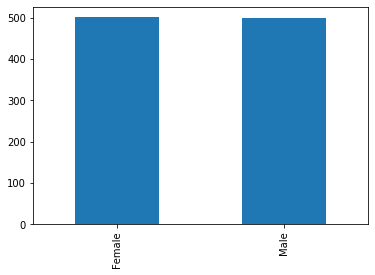

In [9]:
data['Gender'].value_counts().plot(kind='bar');

In [10]:
data_gender_rating = data.groupby('Gender', as_index=False).Rating.mean()
data_gender_rating

,Gender,Rating
0,Female,6.964471
1,Male,6.980962


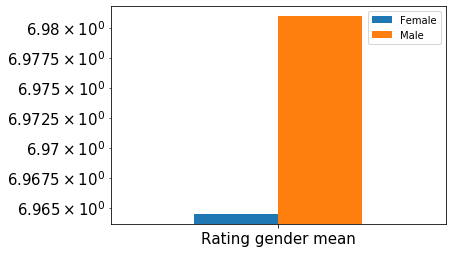

In [11]:
bar("Rating gender mean", data_gender_rating, True)

In [12]:
data_customertype_rating = data.groupby('Customer type', as_index=False).Rating.mean()
data_customertype_rating

,Customer type,Rating
0,Member,6.940319
1,Normal,7.005210


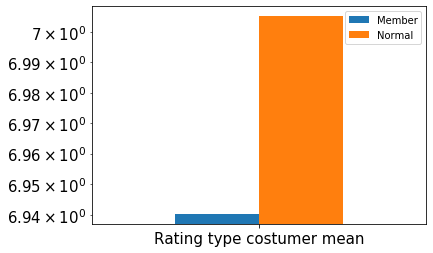

In [13]:
bar("Rating type costumer mean", data_customertype_rating, True)

In [14]:
data_gender_quantity = data.groupby('Gender', as_index=False).Quantity.count()
data_gender_quantity

,Gender,Quantity
0,Female,501
1,Male,499


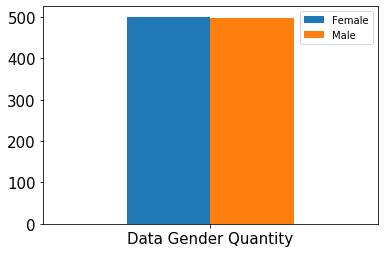

In [15]:
bar("Data Gender Quantity", data_gender_quantity, False)

In [16]:
data_qtt_paymnt = data.groupby('Payment', as_index=False).Quantity.count()
data_qtt_paymnt

,Payment,Quantity
0,Cash,344
1,Credit card,311
2,Ewallet,345


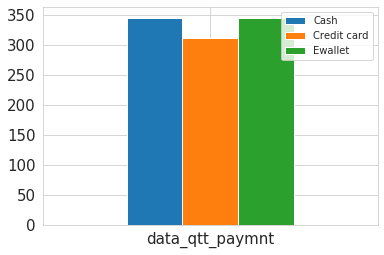

In [29]:
bar3("data_qtt_paymnt", data_qtt_paymnt, False)

In [27]:
data_qtt_city = data.groupby('City', as_index=False).Quantity.count()
data_qtt_city

,City,Quantity
0,Mandalay,332
1,Naypyitaw,328
2,Yangon,340


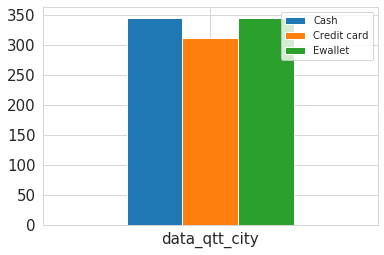

In [28]:
bar3("data_qtt_city", data_qtt_paymnt, False)

In [18]:
data.groupby('Customer type', as_index=False).Quantity.count()

,Customer type,Quantity
0,Member,501
1,Normal,499


In [19]:
data.groupby('Gender', as_index=False).Total.count()

,Gender,Total
0,Female,501
1,Male,499


In [20]:
data_total_sum = data.groupby('Gender', as_index=False).Total.sum()
data_total_sum

,Gender,Total
0,Female,167882.925
1,Male,155083.824


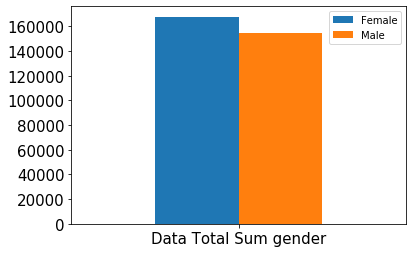

In [21]:
bar("Data Total Sum gender", data_total_sum, False)

In [22]:
data_costumrtype_total_sum = data.groupby('Customer type', as_index=False).Total.sum()
data_costumrtype_total_sum

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


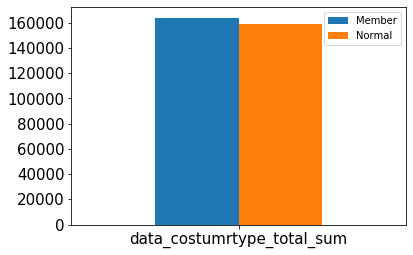

In [23]:
bar("data_costumrtype_total_sum", data_costumrtype_total_sum, False)

#### Datasets by city Naypyitaw, Mandalay, Yangon

In [85]:
data_naypyitaw = data[ data['City'] == 'Naypyitaw']
data_naypyitaw.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
523,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0
496,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,2019-01-01,Cash,126.44,4.761905,6.322,8.5
484,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,2019-01-01,Credit card,369.80,4.761905,18.490,7.0
839,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,Ewallet,175.32,4.761905,8.766,5.0
300,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.982,209.622,2019-01-02,Credit card,199.64,4.761905,9.982,6.7


In [86]:
data_mandalay = data[ data['City'] == 'Mandalay']
data_mandalay.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
856,Mandalay,Normal,Male,Food and beverages,21.12,8,8.4480,177.4080,2019-01-01,Cash,168.96,4.761905,8.4480,6.3
970,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,2019-01-01,Credit card,846.30,4.761905,42.3150,9.0
450,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.4130,470.6730,2019-01-01,Cash,448.26,4.761905,22.4130,6.7
451,Mandalay,Normal,Male,Electronic accessories,22.01,6,6.6030,138.6630,2019-01-02,Cash,132.06,4.761905,6.6030,7.6
425,Mandalay,Member,Male,Fashion accessories,40.61,9,18.2745,383.7645,2019-01-02,Cash,365.49,4.761905,18.2745,7.0


In [87]:
data_yangon = data[ data['City'] == 'Yangon']
data_yangon.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
567,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7
245,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,Cash,380.72,4.761905,19.036,5.7
696,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9
829,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,2019-01-01,Credit card,742.20,4.761905,37.110,4.3
17,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,Credit card,435.66,4.761905,21.783,6.9


In [80]:
data = data.sort_values(by='Date')
data

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
856,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,Cash,168.96,4.761905,8.448,6.3
567,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,Cash,591.66,4.761905,29.583,7.7
245,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,Cash,380.72,4.761905,19.036,5.7
696,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,Ewallet,108.16,4.761905,5.408,6.9
523,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,Ewallet,874.98,4.761905,43.749,6.0
881,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,Credit card,81.44,4.761905,4.072,9.5
963,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,Cash,290.46,4.761905,14.523,6.7
937,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,Cash,447.40,4.761905,22.370,7.4


In [84]:
data.groupby(data['Date'].dt.day)['Total'].sum()

Date
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

In [88]:
data_mandalay.groupby(data_mandalay['Date'].dt.day)['Total'].sum()

Date
1     2470.0095
2     6344.3415
3     3867.9375
4     1746.9480
5     5016.4065
6     4122.7305
7     4363.1280
8     4056.9585
9     4220.1285
10    2378.2185
11    2331.2625
12    5176.8885
13    1485.1830
14    3965.1780
15    7826.9520
16    2965.5885
17    2294.3235
18     760.3890
19    1704.0765
20    3626.8995
21     746.6550
22    2726.8395
23    1611.1200
24    4936.7325
25    4517.4885
26    5539.8525
27    3705.7545
28    3720.8010
29    3006.4860
30    2180.1150
31    2782.2795
Name: Total, dtype: float64

In [72]:
data_date = [np.datetime64(i) for i in data['Date_Time']]
data_date = pd.to_datetime(data_date)
data["Date_Time"] = [i.date() for i in data_date]
#print (str(data_date[0:4]))  
#data_date.date()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 963
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_Time                1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1),

No handles with labels found to put in legend.


Text(0.5, 1.0, 'City of Chicago Financial Summary (2011 to 2017)')

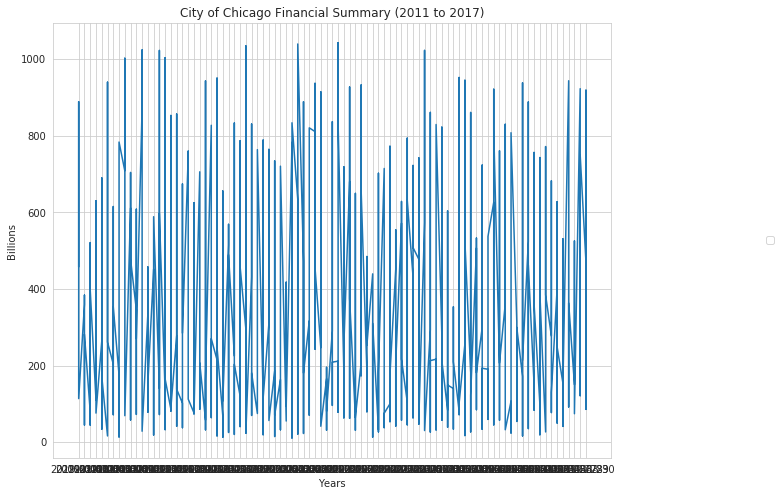

In [62]:
# Adjust figure size
plt.figure(figsize=(10,8))

# Plot the financial data
plt.plot(data_date, data['Total'])
#plt.plot(data_date, data_naypyitaw['Total'])
#plt.plot(data_date, data_yangon['Total'])

# format the plot
sns.set_style("whitegrid")
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("Billions")
plt.xlabel("Years")
plt.title("City of Chicago Financial Summary (2011 to 2017)")

#### Transform city, customer type, gender, product lin, payment in number before sns correelation

In [24]:
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

In [25]:
data_dummies = pd.get_dummies(data, columns=cat_columns, prefix=cat_columns, drop_first=True)
data_dummies.head()

,Date_Time,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,2019-01-05 13:08:00,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,1,0,0,0,0,1,0,0,0,1
1,2019-03-08 10:29:00,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,1,0,1,0,0,0,0,0,0,0,0
2,2019-03-03 13:23:00,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0,1,1,1,0,0,0,1,0,1,0
3,2019-01-27 20:33:00,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0,1,0,1,0,0,1,0,0,0,1
4,2019-02-08 10:37:00,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0,1,1,1,0,0,0,0,1,0,1


### Correlation features

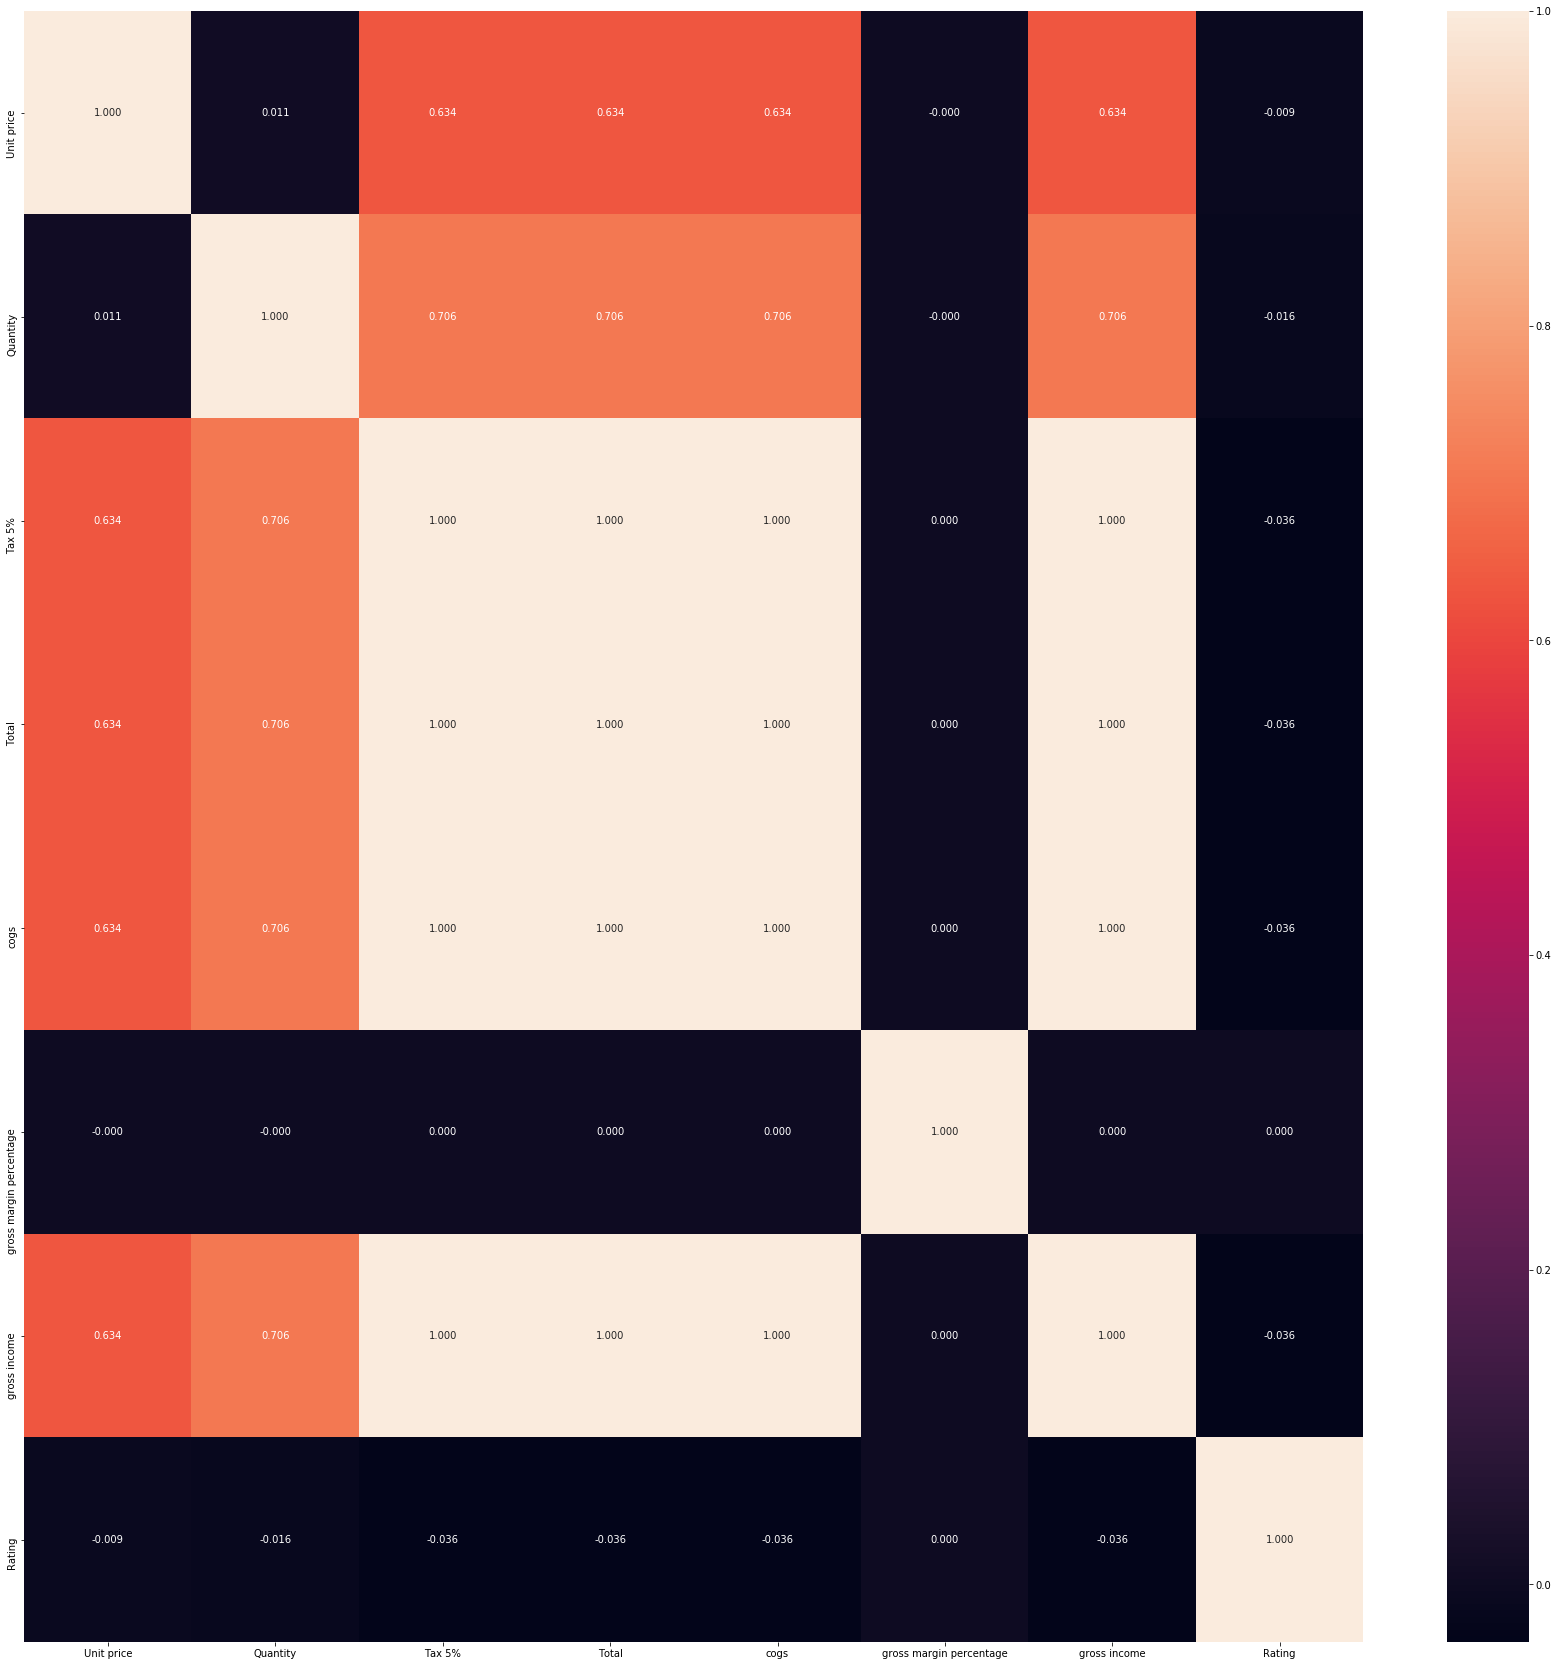

In [26]:
fig= plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, fmt='.3f')
sns.set_style("whitegrid")
plt.show()